In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
aqi = pd.read_csv("https://raw.githubusercontent.com/DheerajKumar97/Air-Quality-Index-Prediction/master/Air%20Quality%20Index%20Prediction.csv")
aqi

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2181,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
2182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2183,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667
2184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preprocessing

In [7]:
aq = aqi.iloc[1::2]
aq

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
1,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
3,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
5,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
7,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
9,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
2177,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
2179,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
2181,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
2183,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


In [9]:
aq = aq.reset_index(drop = True)
aq

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


In [10]:
aq.isna().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [12]:
aq['PM 2.5'][aq['PM 2.5'].isna()]

184   NaN
Name: PM 2.5, dtype: float64

In [13]:
aq['PM 2.5'].mode()

0    0.0
dtype: float64

In [14]:
aq.iloc[184:185, 8:9] = aq.iloc[184: 185, 8:9].fillna('0')

In [16]:
aq.isna().sum().sum()

0

### Data Visualization

array([[<AxesSubplot:title={'center':'T'}>,
        <AxesSubplot:title={'center':'TM'}>,
        <AxesSubplot:title={'center':'Tm'}>],
       [<AxesSubplot:title={'center':'SLP'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'VV'}>],
       [<AxesSubplot:title={'center':'V'}>,
        <AxesSubplot:title={'center':'VM'}>, <AxesSubplot:>]],
      dtype=object)

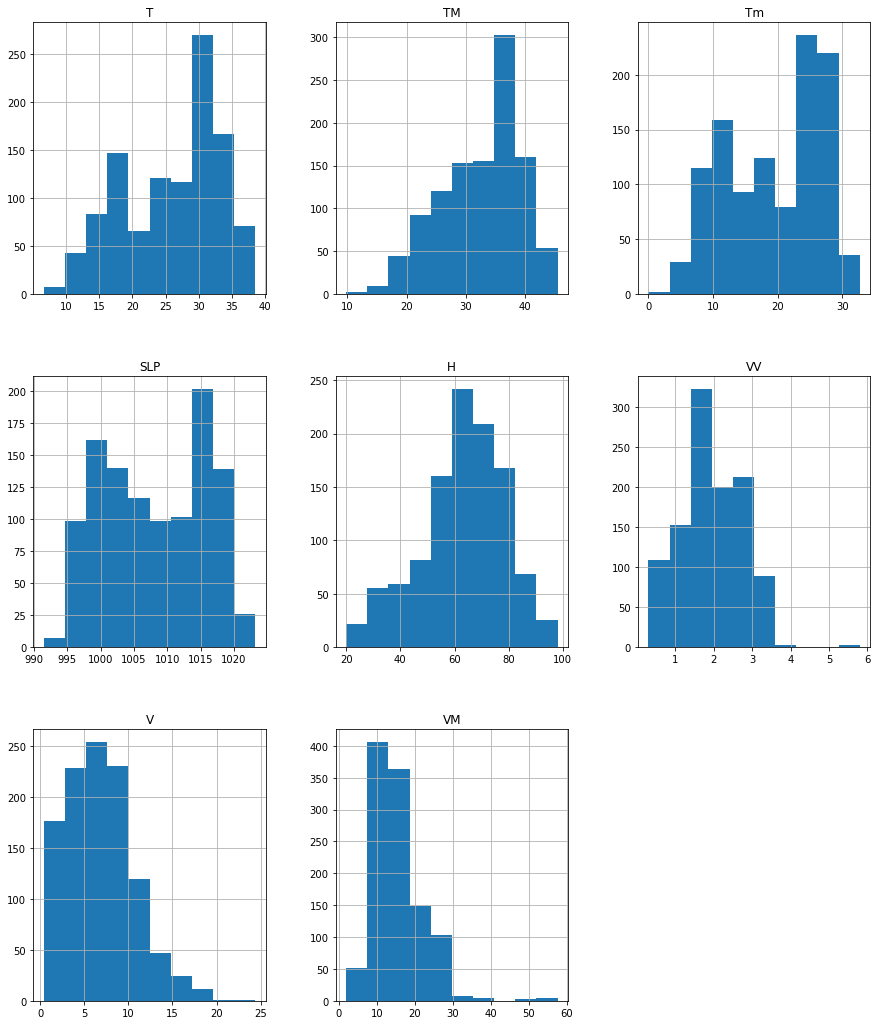

In [19]:
plt.rcParams["figure.figsize"] = 15, 18
aq.hist()

Text(0.5, 1.0, 'Sea Level Pressure Distrbution')

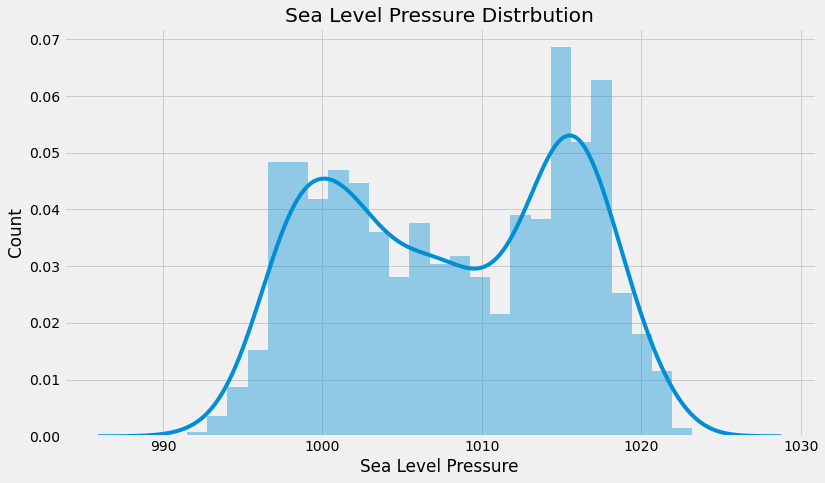

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,7))
sns.distplot(aq.SLP, bins = 25)
plt.xlabel('Sea Level Pressure')
plt.ylabel('Count')
plt.title('Sea Level Pressure Distrbution')

<AxesSubplot:xlabel='TM', ylabel='count'>

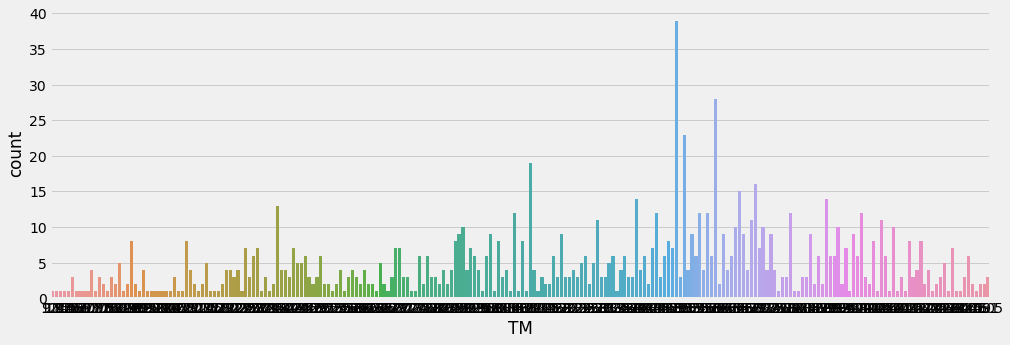

In [23]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(aq.TM, ax=ax)